In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## using '?' as NA indicator in the data file
data = pd.read_csv("http://facweb.cs.depaul.edu/mobasher/classes/CSC478/Data/adult-modified.csv",na_values=['?'])

In [3]:
data.head(10)

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K
5,37.0,Private,14,Married,White,Female,40,<=50K
6,49.0,Private,5,Married,Black,Female,16,<=50K
7,52.0,Self-emp,9,Married,White,Male,45,>50K
8,31.0,Private,14,Single,White,Female,50,>50K
9,42.0,Private,13,Married,White,Male,40,>50K


In [4]:
data.columns


Index(['age', 'workclass', 'education', 'marital-status', 'race', 'sex',
       'hours-per-week', 'income'],
      dtype='object')

In [5]:
data.describe(include='all')

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,9802.000000,9412,10000.000000,10000,10000,10000,10000.000000,10000
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Single,White,Male,NaN,<=50K
freq,NaN,6947,NaN,5017,8556,6703,NaN,7621
mean,38.449806,NaN,10.076600,NaN,NaN,NaN,40.530300,NaN
std,13.611949,NaN,2.548172,NaN,NaN,NaN,12.277197,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,27.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,47.000000,NaN,12.000000,NaN,NaN,NaN,45.000000,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9802 non-null   float64
 1   workclass       9412 non-null   object 
 2   education       10000 non-null  int64  
 3   marital-status  10000 non-null  object 
 4   race            10000 non-null  object 
 5   sex             10000 non-null  object 
 6   hours-per-week  10000 non-null  int64  
 7   income          10000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


In [7]:
## the above indicates that there are some missing values (using '?' as NA indicator) for workclass and age

### Preprocessing and data analysis:

###### Examine the data for missing values. In case of categorical attributes, remove instances with missing values. In the case of numeric attributes, impute and fill-in the missing values using the attribute mean.


In [8]:
## look for rows that has any missing values
data[data.isnull().any(axis=1)] 

,age,workclass,education,marital-status,race,sex,hours-per-week,income
19,NaN,Self-emp,14,Single,White,Female,45,>50K
27,NaN,NaN,10,Married,Asian,Male,60,>50K
40,NaN,Private,5,Married,White,Male,43,<=50K
61,32.0,NaN,4,Married,White,Male,40,<=50K
65,NaN,Private,9,Married,White,Male,40,<=50K
...,...,...,...,...,...,...,...,...
9965,NaN,Private,10,Married,Amer-Indian,Female,40,<=50K
9966,NaN,Private,13,Married,White,Male,50,>50K
9987,67.0,NaN,4,Married,White,Male,40,<=50K
9993,NaN,Private,9,Married,White,Female,15,<=50K


In [9]:
##Fill the missing values for all numeric attributes using the mean value for the attribute
processed_data = data.fillna(data.mean(),axis=0)
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             10000 non-null  float64
 1   workclass       9412 non-null   object 
 2   education       10000 non-null  int64  
 3   marital-status  10000 non-null  object 
 4   race            10000 non-null  object 
 5   sex             10000 non-null  object 
 6   hours-per-week  10000 non-null  int64  
 7   income          10000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


In [10]:
## After filling in the missing numeric values, drop all rows where a categorical attribute contains a missing value.
processed_data.dropna(axis=0,inplace=True)
print(processed_data.info())
print()
print(processed_data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9412 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9412 non-null   float64
 1   workclass       9412 non-null   object 
 2   education       9412 non-null   int64  
 3   marital-status  9412 non-null   object 
 4   race            9412 non-null   object 
 5   sex             9412 non-null   object 
 6   hours-per-week  9412 non-null   int64  
 7   income          9412 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 661.8+ KB
None

(9412, 8)


#### Examine the characteristics of the attributes, including summary statistics for the attributes, histograms illustrating the distribtions of numeric attributes, and bar graphs showing value counts for categorical attributes.

In [11]:
processed_data.describe(include='all')

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,9412.000000,9412,9412.000000,9412,9412,9412,9412.000000,9412
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Married,White,Male,NaN,<=50K
freq,NaN,6947,NaN,4737,8062,6383,NaN,7093
mean,38.366342,NaN,10.125266,NaN,NaN,NaN,41.080217,NaN
std,12.962039,NaN,2.542118,NaN,NaN,NaN,11.884590,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,28.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,47.000000,NaN,13.000000,NaN,NaN,NaN,45.000000,NaN


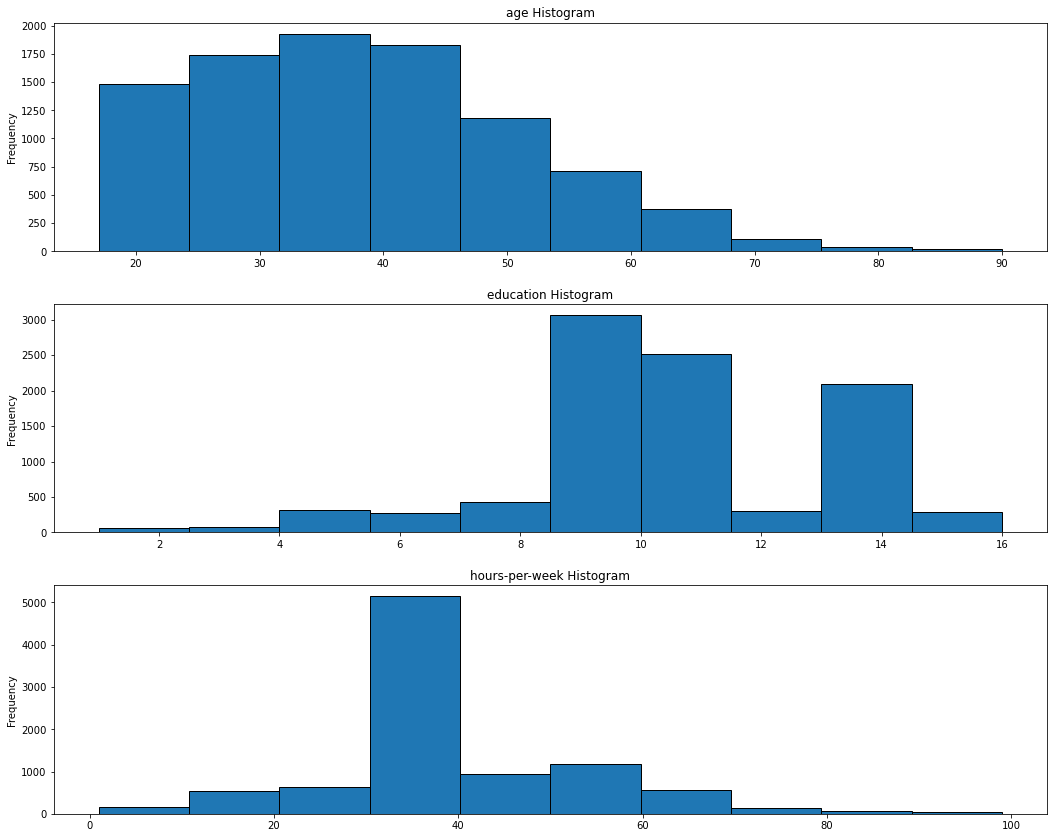

In [12]:

numerical_features = ['age','education','hours-per-week']

fig, ax = plt.subplots(3,1,figsize=(15,12))
ax=ax.flatten()
for i, numerical_feature in enumerate(processed_data[numerical_features]):
    processed_data[numerical_feature].plot(kind="hist", ax=ax[i],grid = False,edgecolor='black').set_title(numerical_feature+" Histogram")
    
fig.tight_layout(pad=2.0)

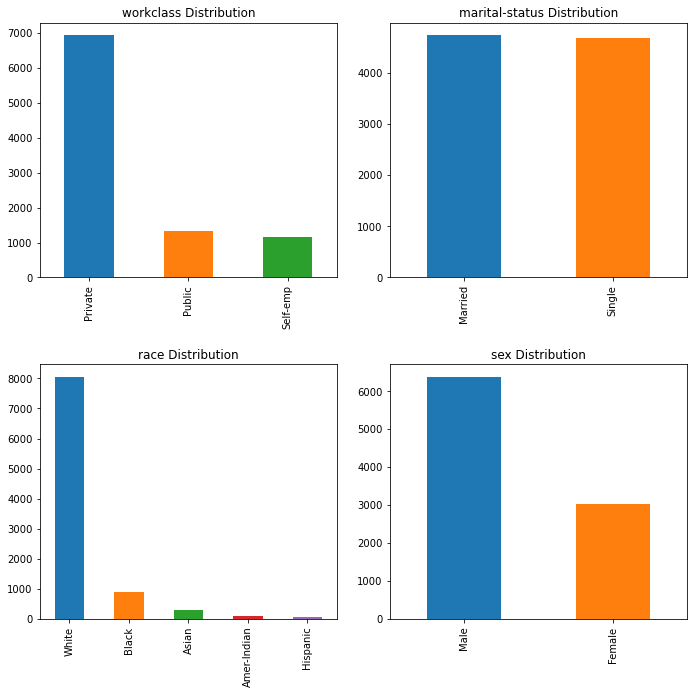

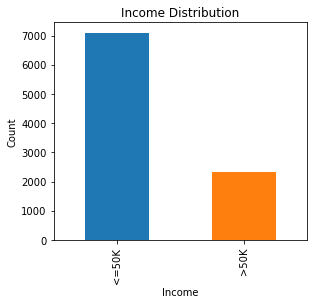

In [13]:
categorical_features = [ 'workclass',  'marital-status', 'race', 'sex']
fig, ax = plt.subplots(2,2,figsize=(10,10))
ax=ax.flatten()
for i, categorical_feature in enumerate(processed_data[categorical_features]):
    processed_data[categorical_feature].value_counts().plot(kind="bar", ax=ax[i],color=['C0', 'C1', 'C2', 'C3', 'C4']).set_title(categorical_feature+' Distribution')


fig2 = plt.figure(figsize=(10,10))
fig2.subplots_adjust(hspace=.5)

ax1 = fig2.add_subplot(221)
ax1.set_xlabel('Income')
ax1.set_ylabel('Count')
ax1.set_title("Income Distribution")
processed_data['income'].value_counts().plot(kind='bar', grid = False,color=['C0', 'C1', 'C2', 'C3', 'C4'])

fig.tight_layout(pad=2.0)

#### Perform the following cross-tabulations (including generating bar charts): education+race, work-class+income, work-class+race, and race+income. In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. 
####Discuss your observations from this analysis.

In [14]:
print(categorical_features)
print(numerical_features)

['workclass', 'marital-status', 'race', 'sex']
['age', 'education', 'hours-per-week']


In [15]:
cross_tab_dic={}
cross_tab_dic["education+race"]=['education','race']
cross_tab_dic["work-class+income"]=['workclass','income']
cross_tab_dic["work-class+race"]=['workclass','race']
cross_tab_dic["race+income"]=['race','income']
cross_tab_dic.keys()

dict_keys(['education+race', 'work-class+income', 'work-class+race', 'race+income'])

*********** Performing cross-tabulations (including generating bar charts) for ['education', 'race'] *************** 

race       Amer-Indian  Asian  Black  Hispanic  White
education                                            
1                    0      0      1         0     11
2                    0      1      4         3     38
3                    0      4      5         1     71
4                    5      5     14         6    150
5                    0      3     19         2    118
6                    8      3     30         4    223
7                    4      6     49         4    261
8                    0      2     17         3     78
9                   35     67    350        23   2590
10                  26     64    206        11   1818
11                   5     10     33         4    337
12                   4      5     33         3    259
13                   5     75    102         8   1387
14                   0     27     20         1    467
15               

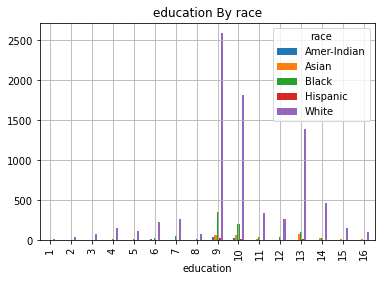


*********** Performing cross-tabulations (including generating bar charts) for ['workclass', 'income'] *************** 

income     <=50K  >50K
workclass             
Private     5443  1504
Public       925   392
Self-emp     725   423


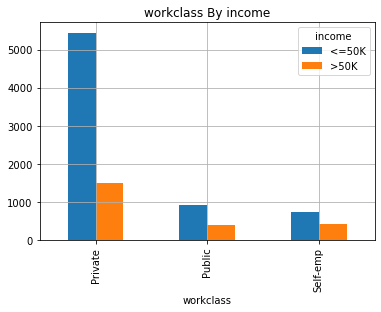


*********** Performing cross-tabulations (including generating bar charts) for ['workclass', 'race'] *************** 

race       Amer-Indian  Asian  Black  Hispanic  White
workclass                                            
Private             65    204    664        64   5950
Public              20     48    192         5   1052
Self-emp             7     39     36         6   1060


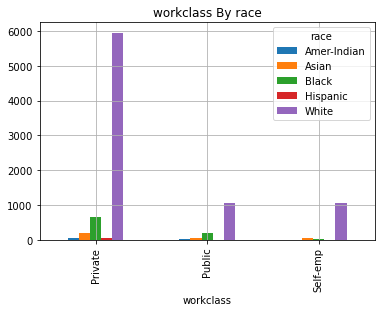


*********** Performing cross-tabulations (including generating bar charts) for ['race', 'income'] *************** 

income       <=50K  >50K
race                    
Amer-Indian     83     9
Asian          224    67
Black          773   119
Hispanic        69     6
White         5944  2118


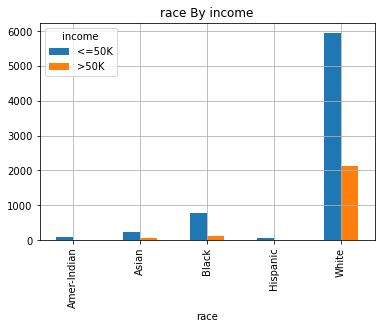



>>>In the latter case (race+income) create a table or chart showing % of each race cat that fall in low-income group <<<


income          <=50K      >50K
race                           
Amer-Indian  0.902174  0.097826
Asian        0.769759  0.230241
Black        0.866592  0.133408
Hispanic     0.920000  0.080000
White        0.737286  0.262714


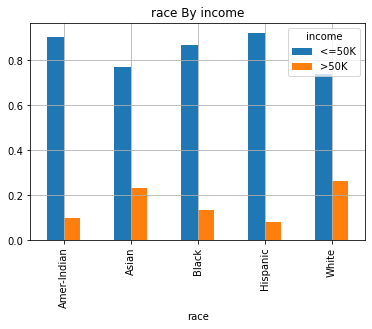

In [16]:

for keys in cross_tab_dic.keys():
    print("*********** Performing cross-tabulations (including generating bar charts) for {} *************** \n".format(cross_tab_dic[keys]))
    cross_tab=pd.crosstab(processed_data[cross_tab_dic[keys][0]],processed_data[cross_tab_dic[keys][1]])
    print(cross_tab)
    plt.show(cross_tab.plot(kind='bar',grid='True',title=cross_tab_dic[keys][0]+' By '+cross_tab_dic[keys][1]))
   
    ## In the latter case (race+income) create a table or chart showing % of each race cat that fall in low-income group
    if(keys == 'race+income'):
        print("\n\n>>>In the latter case (race+income) create a table or chart showing % of each race cat that fall in low-income group <<<\n\n")
        newdf = pd.crosstab(processed_data[cross_tab_dic[keys][0]],processed_data[cross_tab_dic[keys][1]]).apply(lambda r: r/r.sum(), axis=1)
        print(newdf)
        plt.show(newdf.plot(kind='bar',grid='True',title=cross_tab_dic[keys][0]+' By '+cross_tab_dic[keys][1]))
   
    print()

<style type="text/css">
.tg  {border-collapse:collapse;border-color:#C44D58;border-spacing:0;}
.tg td{background-color:#F9CDAD;border-color:#C44D58;border-style:solid;border-width:1px;color:#002b36;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#FE4365;border-color:#C44D58;border-style:solid;border-width:1px;color:#fdf6e3;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-f8tv{border-color:inherit;font-style:italic;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-fymr">Observation Analysis</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-f8tv">1. It is clear from above that for each race a high percentage of population belongs to low income category (&lt;=50K).</td>
  </tr>
  <tr>
    <td class="tg-f8tv">2. However, white race relatively seem have highest percentage of people that belong to high income category, followed by Asian and Black.</td>
  </tr>
  <tr>
    <td class="tg-f8tv">3. Hispanic &nbsp;&nbsp; have the lowest population that belong to high income category</td>
  </tr>
</tbody>
</table>

#### Compare and contrast the characteristics of the low-income and high-income categories across the different attributes.

In [17]:
##processed_data.groupby('income').sum().boxplot()

income        <=50K      >50K
workclass                    
Private    0.783504  0.216496
Public     0.702354  0.297646
Self-emp   0.631533  0.368467


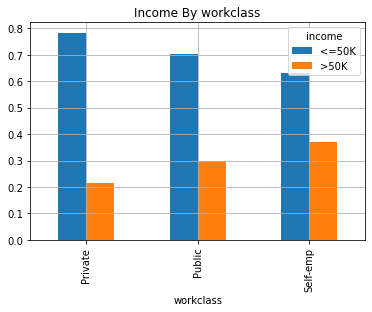

income             <=50K      >50K
marital-status                    
Married         0.576314  0.423686
Single          0.933262  0.066738


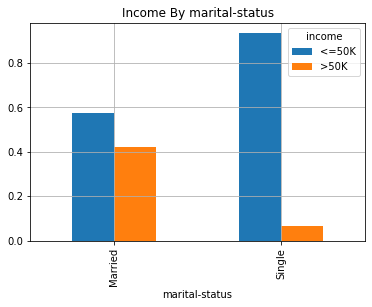

income          <=50K      >50K
race                           
Amer-Indian  0.902174  0.097826
Asian        0.769759  0.230241
Black        0.866592  0.133408
Hispanic     0.920000  0.080000
White        0.737286  0.262714


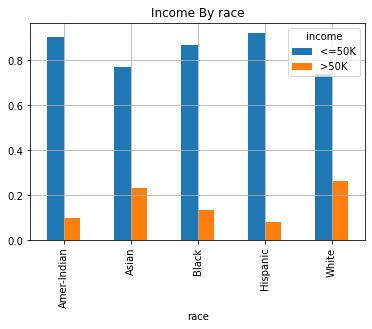

income     <=50K      >50K
sex                       
Female  0.881149  0.118851
Male    0.693091  0.306909


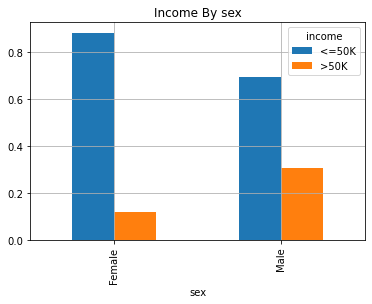

In [18]:
categorical_features = [ 'workclass',  'marital-status', 'race', 'sex']

for i, categorical_feature in enumerate(processed_data[categorical_features]):
    cross_tab=pd.crosstab(processed_data[categorical_feature],processed_data['income']).apply(lambda x: x/x.sum(), axis = 1)
    print(cross_tab)
    plt.show(cross_tab.plot(kind='bar',grid='True',title='Income By '+categorical_feature))


### Compare and contrast the characteristics of the low-income and high-income categories across the different attributes.

People working in private sector seem to have low income (<=50K) while self employed are more likely to make high income (>50K)
Also, married people are more likely (57%) to have high income compared to single people who are mostly in low income category (93%).

Also, looks like female tend to have lower income compared male population because only 11% of female population belong to high income category(>50K) where as 30% Male population have high income


# 3.b. => Predictive Modeling and Model Evaluation

## Using either Pandas or Scikit-learn, create dummy variables for the categorical attributes. Then separate the target attribute ("income_>50K") from the attributes used for training. [Note: you need to drop "income_<=50K" which is also created as a dummy variable in earlier steps). Split the data into training and test sets (80%-20% split).

In [19]:
processed_data_ssf = pd.get_dummies(processed_data)
columns_context = ['age', 'education', 'hours-per-week', 'workclass_Private',
       'workclass_Public', 'workclass_Self-emp', 'marital-status_Married',
       'marital-status_Single', 'race_Amer-Indian', 'race_Asian', 'race_Black',
       'race_Hispanic', 'race_White', 'sex_Female', 'sex_Male']

#separate the target attribute ("income_>50K") from the attributes used for training
vs_target = processed_data_ssf['income_>50K']

## drop "income_<=50K"
vs_matrix = processed_data_ssf[columns_context]

vs_matrix.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39.0,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50.0,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38.0,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53.0,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28.0,13,40,1,0,0,1,0,0,0,1,0,0,1,0


In [20]:
vs_target.head()

0    0
1    0
2    0
3    0
4    0
Name: income_>50K, dtype: uint8

In [21]:
#Split the data into training and test sets (80%-20% split).
from sklearn.model_selection import train_test_split
vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs_matrix, vs_target, test_size=0.2, random_state=33)

print(vs_test.shape)
vs_test[0:5]

(1883, 15)


,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
8419,56.0,10,45,1,0,0,1,0,0,0,0,0,1,0,1
2629,54.0,9,45,1,0,0,1,0,0,0,0,0,1,0,1
2523,52.0,11,35,1,0,0,0,1,0,0,0,0,1,1,0
7143,42.0,16,60,0,0,1,1,0,0,0,0,0,1,0,1
5902,30.0,9,50,0,0,1,1,0,0,0,0,0,1,0,1


### Use scikit-learn to build classifiers usinng Naive Bayes (Gaussian), decision tree (using "gini" as selection criteria), and linear discriminant analysis (LDA).  For each of these perform 10-fold cross-validation on the training data (using cross-validation module in scikit-learn) and report the overall average accuracy. Compare this to the model accuracy on the training data. Finally, run your model on the set-aside test data.

In [22]:
from sklearn import tree,naive_bayes
from sklearn.model_selection import cross_val_score

In [23]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(vs_train, vs_target_train)
cv_scores = cross_val_score(nbclf, vs_matrix, vs_target, cv=10)

print(' Naive Bayes (Gaussian) cv_scores',cv_scores)
print(" Naive Bayes (Gaussian) Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))


treeclf = tree.DecisionTreeClassifier(criterion='gini')
treeclf = treeclf.fit(vs_train, vs_target_train)
cv_scores = cross_val_score(treeclf, vs_matrix, vs_target, cv=10)

print('\n DecisionTreeClassifier - Gini cv_scores',cv_scores)
print(" DecisionTreeClassifier - Gini - Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(vs_train, vs_target_train)

cv_scores = cross_val_score(ldclf, vs_matrix, vs_target, cv=10)

print('\n LDA - cv_scores',cv_scores)
print(" LDA - Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

 Naive Bayes (Gaussian) cv_scores [0.72823779 0.70488323 0.73113709 0.70669501 0.73219979 0.70563231
 0.7120085  0.7183847  0.73113709 0.7077577 ]
 Naive Bayes (Gaussian) Overall Accuracy on X-Val: 0.72 (+/- 0.02)

 DecisionTreeClassifier - Gini cv_scores [0.75690021 0.77282378 0.77045696 0.77470776 0.77470776 0.76514346
 0.73857598 0.78002125 0.76833156 0.76514346]
 DecisionTreeClassifier - Gini - Overall Accuracy on X-Val: 0.77 (+/- 0.02)

 LDA - cv_scores [0.81210191 0.80997877 0.79277365 0.81721573 0.80977683 0.78852285
 0.80021254 0.80765143 0.82146652 0.81615303]
 LDA - Overall Accuracy on X-Val: 0.81 (+/- 0.02)


In [24]:
nbpreds_test = nbclf.predict(vs_test)

print(" Naive Bayes (Gaussian) - Score => Training: ", np.round(nbclf.score(vs_train, vs_target_train),2)," Test: ", np.round(nbclf.score(vs_test, vs_target_test),2))
print(" Naive Bayes (Gaussian) - predictions : ", nbpreds_test)

treepreds_test = treeclf.predict(vs_test)

print("\n DecisionTreeClassifier - Gini - Score => Training: ", np.round(treeclf.score(vs_train, vs_target_train),2)," Test: ", np.round(treeclf.score(vs_test, vs_target_test),2)," (Overfitting)")
print(" DecisionTreeClassifier - Gini - predictions : ", treepreds_test)

ldpreds_test = ldclf.predict(vs_test)

print("\n LDA Score on Training: ", np.round(ldclf.score(vs_train, vs_target_train),2)," Test: ", np.round(ldclf.score(vs_test, vs_target_test),2))
print(" LDA - predictions : ", ldpreds_test)

 Naive Bayes (Gaussian) - Score => Training:  0.72  Test:  0.72
 Naive Bayes (Gaussian) - predictions :  [1 1 0 ... 1 0 1]

 DecisionTreeClassifier - Gini - Score => Training:  0.94  Test:  0.77  (Overfitting)
 DecisionTreeClassifier - Gini - predictions :  [0 1 0 ... 0 0 1]

 LDA Score on Training:  0.81  Test:  0.81
 LDA - predictions :  [1 0 0 ... 0 0 1]


In [25]:
def plotConfusionMatrix(clfMap,type):
    
    plt.matshow(clfMap,cmap = plt.cm.Accent_r)
    plt.title('Confusion matrix '+type+"\n")
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.xticks([0,1],['No','Yes'])
    plt.yticks([0,1],['No','Yes'])
    for y in range(clfMap.shape[0]):
        for x in range(clfMap.shape[1]):
            plt.text(x, y, '{}'.format(clfMap[y,x]),
                    horizontalalignment = 'center',
                    verticalalignment = 'center',)
    plt.show()



************ Naive Bayes (Gaussian) - confusion_matrix ********************* 
 [[1027  416]
 [ 113  327]]


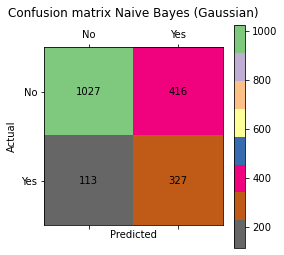


************ DecisionTreeClassifier - Gini - confusion_matrix ********************* 
 [[1252  191]
 [ 247  193]]


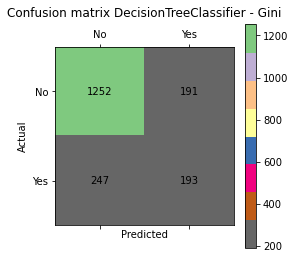


************ LDA - confusion_matrix ********************* 
 [[1310  133]
 [ 223  217]]


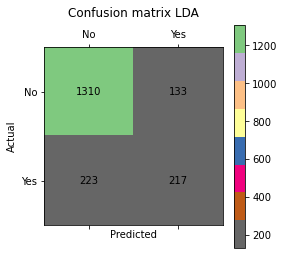

In [26]:
# Generate confusion matrix

from sklearn.metrics import confusion_matrix

NBcm = confusion_matrix(vs_target_test, nbpreds_test)
treecm  = confusion_matrix(vs_target_test, treepreds_test)
ldacm  = confusion_matrix(vs_target_test, ldpreds_test)

print("\n************ Naive Bayes (Gaussian) - confusion_matrix ********************* \n",NBcm)
plotConfusionMatrix(NBcm,"Naive Bayes (Gaussian)")
print("\n************ DecisionTreeClassifier - Gini - confusion_matrix ********************* \n",treecm)
plotConfusionMatrix(treecm,"DecisionTreeClassifier - Gini")
print("\n************ LDA - confusion_matrix ********************* \n",ldacm)
plotConfusionMatrix(ldacm,"LDA")